In [34]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Social_Network_Ads.csv")   #reading the libraries
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [37]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [38]:
gender_df=pd.DataFrame(pd.value_counts(df["Gender"]))
gender_df

,Gender
Female,204
Male,196


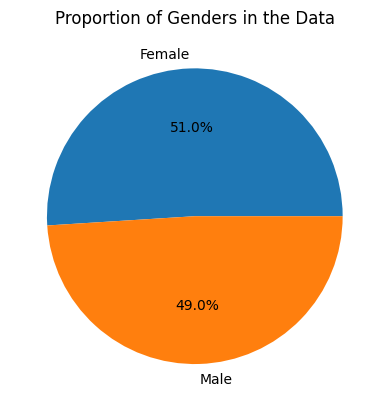

In [61]:
# Pie Chart for Gender Attribute
plt.figure(figsize=(5,5))
plt.pie(gender_df["Gender"],labels=gender_df.index,autopct='%.1f%%')
plt.title("Proportion of Genders in the Data")
plt.show()

In [63]:
# Box and whisker plot for Estimated Salary
import plotly.express as px
fig=px.box(df,y=df["EstimatedSalary"],title="Outlier Checking for Estimated Salary")
fig.update_layout(width=800, height=500)
fig.show()

In [64]:
#histogram Plot for Age
fig=px.histogram(df,x="Age",color="Purchased",title="Purchases on the basis of Age")
fig.update_layout(width=800, height=500)
fig.show()

In [65]:
# Histogram plot for Estimated Salary
fig=px.histogram(df,x="EstimatedSalary",color="Purchased",title="Purchases on the basis of Estimated Salary")
fig.update_layout(width=800, height=500)
fig.show()

In [66]:
#Scatter Plot between Age and Estimated Salary
fig=px.scatter(df,x="Age",y="EstimatedSalary",title="Scatter Plot between Age and Estimated Salary")
fig.update_layout(width=800, height=500)
fig.show()

# No such correlation is observed

In [44]:
#Dropping the UserID
df.drop("User ID",axis=1,inplace=True)

In [45]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [46]:
from sklearn.preprocessing import LabelEncoder     # Label encoding the Gender
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [47]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [48]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [49]:
print("The independent variables are: \n",X)

The independent variables are: 
      Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]


In [50]:
print("The target class column is: \n",Y)

The target class column is: 
 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [51]:
from sklearn.preprocessing import StandardScaler   # strandizing the dataset
sc=StandardScaler()
X=sc.fit_transform(X)

In [52]:
print("The standardised X: \n",X)

The standardised X: 
 [[ 1.02020406 -1.78179743 -1.49004624]
 [ 1.02020406 -0.25358736 -1.46068138]
 [-0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.98019606  1.17910958 -1.46068138]
 [ 1.02020406 -0.15807423 -1.07893824]
 [-0.98019606  1.08359645 -0.99084367]]


In [53]:
from sklearn.model_selection import train_test_split   #splitting the dataset into training and test data
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [54]:
from sklearn.linear_model import LogisticRegression    # Logistic Regression
from sklearn import metrics
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
y_pred1=lr.predict(xtest)
print("The classification report for Logistic Regression is: \n",metrics.classification_report(y_pred1,ytest))

The classification report for Logistic Regression is: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        46
           1       0.81      0.76      0.79        34

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80



In [55]:
from sklearn.tree import DecisionTreeClassifier    # Decision Tree Classifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=1)
dt.fit(xtrain,ytrain)
y_pred2=dt.predict(xtest)
print("The classification report for Decision Tree Classifier is: \n",metrics.classification_report(y_pred2,ytest))

The classification report for Decision Tree Classifier is: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.94      0.77      0.85        39

    accuracy                           0.86        80
   macro avg       0.88      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



In [56]:
from sklearn.ensemble import RandomForestClassifier   #Random Forest Classifier
rd=RandomForestClassifier(n_estimators=100)
rd.fit(xtrain,ytrain)
y_pred3=rd.predict(xtest)
print("The classification report for Random Forest Classifier is: \n",metrics.classification_report(y_pred3,ytest))

The classification report for Random Forest Classifier is: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.91      0.78      0.84        37

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



In [57]:
from sklearn.naive_bayes import GaussianNB   # naive bayes(GaussianNB)
ny=GaussianNB()
ny.fit(xtrain,ytrain)
y_pred4=rd.predict(xtest)
print("The classification report for Naive Bayes is: \n",metrics.classification_report(y_pred4,ytest))

The classification report for Naive Bayes is: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.91      0.78      0.84        37

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



In [58]:
from sklearn.neighbors import KNeighborsClassifier    # K nearest Neighbors
knn=KNeighborsClassifier(n_neighbors=20,metric="minkowski",p=2)
knn.fit(xtrain,ytrain)
y_pred5=knn.predict(xtest)
print("The classification report for K-Nearest-Neighbors is: \n ",metrics.classification_report(y_pred5,ytest))

The classification report for K-Nearest-Neighbors is: 
                precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.94      0.83      0.88        36

    accuracy                           0.90        80
   macro avg       0.91      0.89      0.90        80
weighted avg       0.90      0.90      0.90        80



In [59]:
# for the above dataset K-Nearest-Neighbors is suitable with the accuracy of 90% and k-neighbors 20